# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [2]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Instantiating models

In [3]:
knn_model = knn(k=3, type_distance_calc='euclidean')
dmc_model = dmc(type_distance_calc='euclidean')

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Running the tests and computing informations

In [4]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model.fit(X_train, y_train)
    dmc_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)

# Showing knn informations computed

In [5]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.8548387096774194, 0.8387096774193549, 0.8548387096774194, 0.7419354838709677, 0.9193548387096774, 0.7903225806451613, 0.7903225806451613, 0.8064516129032258, 0.8064516129032258, 0.8387096774193549, 0.8387096774193549, 0.7741935483870968, 0.7096774193548387, 0.8548387096774194, 0.8225806451612904, 0.7741935483870968, 0.8387096774193549, 0.8064516129032258, 0.9032258064516129, 0.8870967741935484]

Accuracy:
0.82258064516129

Standard Deviation:
0.05049185755644687

Confusion Matrix:
[[ 9  2  0]
 [ 6 16  1]
 [ 0  0 28]]
[[ 5  3  0]
 [ 4 13  1]
 [ 1  1 34]]
[[ 5  6  0]
 [ 3 19  0]
 [ 0  0 29]]
[[ 2  5  0]
 [ 4 22  3]
 [ 0  4 22]]
[[ 5  3  0]
 [ 2 18  0]
 [ 0  0 34]]
[[10  6  0]
 [ 3 19  0]
 [ 2  2 20]]
[[ 9  3  0]
 [ 5  9  0]
 [ 1  4 31]]
[[11  5  0]
 [ 6 12  1]
 [ 0  0 27]]
[[ 5  4  0]
 [ 3 12  2]
 [ 0  3 33]]
[[ 7  7  0]
 [ 3 14  0]
 [ 0  0 31]]
[[ 6  5  0]
 [ 4 12  0]
 [ 0  1 34]]
[[ 8  8  0]
 [ 4 16  2]
 [ 0  0 24]]
[[ 6  8  0]

# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.6774193548387096, 0.7419354838709677, 0.7258064516129032, 0.7419354838709677, 0.8548387096774194, 0.6935483870967742, 0.8225806451612904, 0.8387096774193549, 0.7741935483870968, 0.8709677419354839, 0.7419354838709677, 0.7903225806451613, 0.6451612903225806, 0.7419354838709677, 0.8709677419354839, 0.7419354838709677, 0.8387096774193549, 0.7419354838709677, 0.7741935483870968, 0.8064516129032258]

Accuracy:
0.771774193548387

Standard Deviation:
0.06252470895549041

Confusion Matrix:
[[ 8  3  0]
 [ 9 12  2]
 [ 3  3 22]]
[[ 7  1  0]
 [ 7 10  1]
 [ 4  3 29]]
[[ 8  3  0]
 [ 8 14  0]
 [ 2  4 23]]
[[ 6  1  0]
 [ 8 20  1]
 [ 0  6 20]]
[[ 4  4  0]
 [ 1 19  0]
 [ 1  3 30]]
[[13  3  0]
 [ 7 15  0]
 [ 4  5 15]]
[[11  1  0]
 [ 4 10  0]
 [ 1  5 30]]
[[14  2  0]
 [ 6 13  0]
 [ 1  1 25]]
[[ 8  1  0]
 [ 6 10  1]
 [ 1  5 30]]
[[13  1  0]
 [ 6 11  0]
 [ 1  0 30]]
[[10  1  0]
 [ 9  6  1]
 [ 2  3 30]]
[[13  3  0]
 [ 6 15  1]
 [ 3  0 21]]
[[10  4  0

# Choosing two columns from the last X_train and X_test to plot decision surface

In [7]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
60   74.38  32.05
258  40.35  10.19
214  45.70  10.66
135  77.12  30.35
244  63.03  27.34
..     ...    ...
1    39.06  10.06
238  69.00  13.29
4    49.71   9.65
221  54.95   5.87
85   45.44   9.91

[248 rows x 2 columns]
Test dataset:
         0      1
121  83.88  23.08
65   83.93  41.29
131  69.78  13.78
110  63.90  13.71
97   74.72  19.76
..     ...    ...
190  43.72   9.81
292  34.76   2.63
84   76.33  42.40
82   88.62  29.09
83   81.10  24.79

[62 rows x 2 columns]


# Training the models with the new dataset 2d

In [8]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

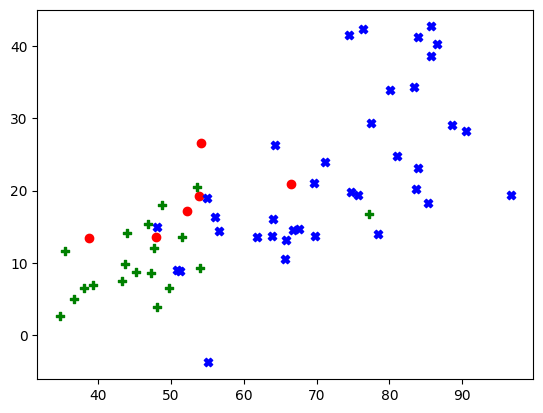

In [10]:
data = X_test_2d[:][:].values

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

dh = np.where(knn_y_pred == 'DH')
sl = np.where(knn_y_pred == 'SL')
no = np.where(knn_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='blue', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='green', marker='P', label='no')

plt.show()

# Plotting dmc decision surface

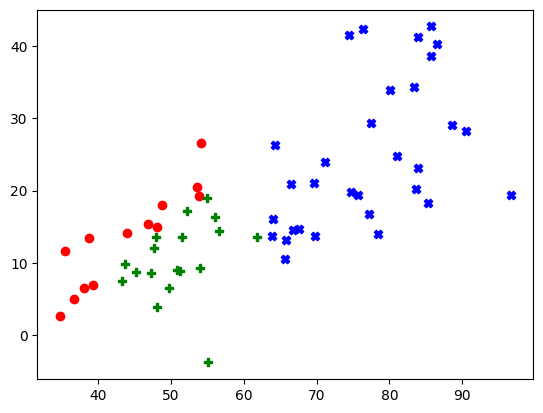

In [11]:
data = X_test_2d[:][:].values

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

dh = np.where(dmc_y_pred == 'DH')
sl = np.where(dmc_y_pred == 'SL')
no = np.where(dmc_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='blue', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='green', marker='P', label='no')

plt.show()